In [2]:
import os
os.chdir("C:/Users/Komal S Boraste/Desktop/LRProject/Linear Regression using Python")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression

df=pd.read_csv("Fish_dataset.csv")

In [3]:
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [4]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [6]:
df.describe(include='object')

,Species
count,159
unique,7
top,Perch
freq,56


### Q1. Plot a bar chart showing count of individual species? 

Text(0, 0.5, 'Frequency')

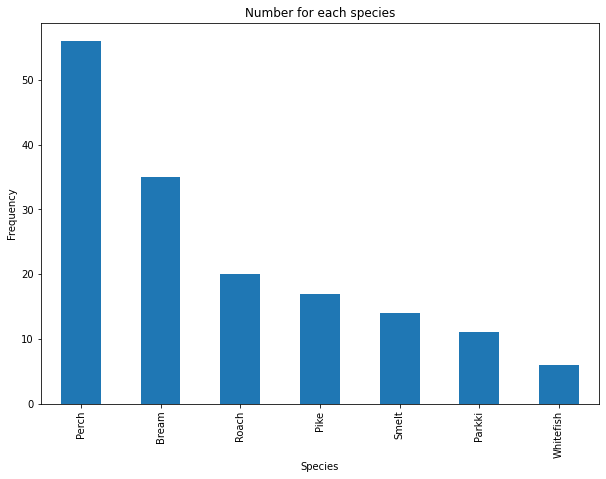

In [7]:
a=df['Species'].value_counts().plot(kind='bar',figsize=(10,7),title='Number for each species')
a.set_xlabel('Species')
a.set_ylabel('Frequency')

### Q2. Identify outliers and remove if any?

In [145]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

In [143]:
data=df

In [19]:
df.drop('Species',inplace=True,axis=1)

In [20]:
df.columns

Index(['Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'], dtype='object')

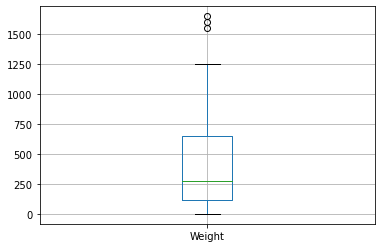

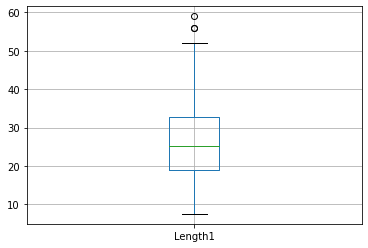

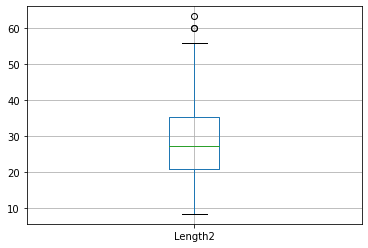

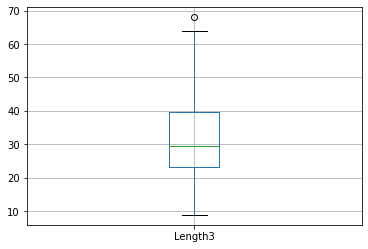

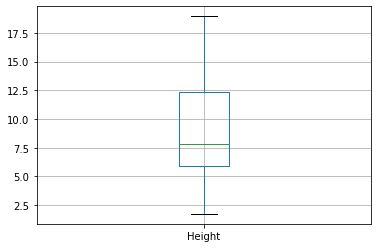

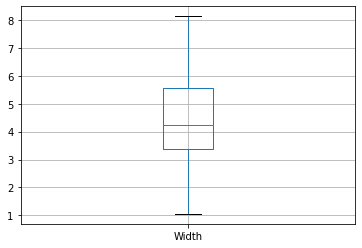

In [21]:
for columns in df:
    plt.figure()
    df.boxplot([columns])

In [291]:
df1=pd.read_csv("Fish_dataset.csv")

In [292]:
df1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [293]:
#Removing Outliers
Q1=np.quantile(df1['Weight'],0.25)

In [294]:
Q1

120.0

In [295]:
Q3=np.quantile(df1['Weight'],0.75)

In [296]:

Q3

650.0

In [297]:
IQR=Q3-Q1

In [298]:
IQR

530.0

In [299]:
Lower_limit=Q1-1.5*IQR
Upper_limit=Q3+1.5*IQR

In [300]:
df1[(df1.Weight<Lower_limit)|(df1.Weight>Upper_limit)]

,Species,Weight,Length1,Length2,Length3,Height,Width
142,Pike,1600.0,56.0,60.0,64.0,9.600,6.144
143,Pike,1550.0,56.0,60.0,64.0,9.600,6.144
144,Pike,1650.0,59.0,63.4,68.0,10.812,7.480


In [301]:
new_df=df1[(df1.Weight>Lower_limit)&(df1.Weight<Upper_limit)]

In [302]:
new_df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

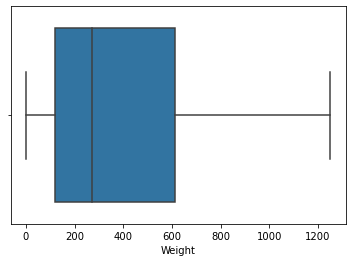

In [303]:
sns.boxplot(new_df["Weight"])

C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length2'>

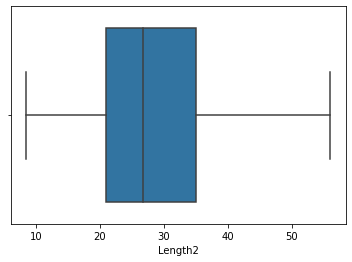

In [304]:
sns.boxplot(new_df['Length2'])

C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Length3'>

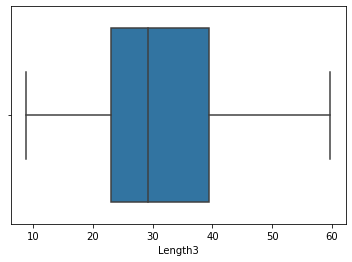

In [305]:
sns.boxplot(new_df['Length3'])

### Q3. Build a regression model and print regression equation?
### Q.5 Compare real and predicted weights and give a conclusion statement based on it?

In [306]:
dummy_var1=pd.get_dummies(new_df['Species']) #create a dummy var obj

In [307]:
dummy_var1

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0
155,0,0,0,0,0,1,0
156,0,0,0,0,0,1,0
157,0,0,0,0,0,1,0


In [308]:
df1.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [309]:
df_num=new_df[['Weight', 'Length1', 'Length2', 'Length3', 'Height','Width']]

In [310]:
df_num

,Weight,Length1,Length2,Length3,Height,Width
0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,290.0,24.0,26.3,31.2,12.4800,4.3056
2,340.0,23.9,26.5,31.1,12.3778,4.6961
3,363.0,26.3,29.0,33.5,12.7300,4.4555
4,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936
155,13.4,11.7,12.4,13.5,2.4300,1.2690
156,12.2,12.1,13.0,13.8,2.2770,1.2558
157,19.7,13.2,14.3,15.2,2.8728,2.0672


In [350]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 158
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Weight   156 non-null    float64
 1   Length1  156 non-null    float64
 2   Length2  156 non-null    float64
 3   Length3  156 non-null    float64
 4   Height   156 non-null    float64
 5   Width    156 non-null    float64
dtypes: float64(6)
memory usage: 8.5 KB


In [311]:
df_combine=pd.concat([dummy_var1,df_num],axis=1)

In [312]:
df_combine

,Bream,Parkki,Perch,Pike,Roach,Smelt,Whitefish,Weight,Length1,Length2,Length3,Height,Width
0,1,0,0,0,0,0,0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,1,0,0,0,0,0,0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,1,0,0,0,0,0,0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,1,0,0,0,0,0,0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,1,0,0,0,0,0,0,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,0,0,0,0,0,1,0,12.2,11.5,12.2,13.4,2.0904,1.3936
155,0,0,0,0,0,1,0,13.4,11.7,12.4,13.5,2.4300,1.2690
156,0,0,0,0,0,1,0,12.2,12.1,13.0,13.8,2.2770,1.2558
157,0,0,0,0,0,1,0,19.7,13.2,14.3,15.2,2.8728,2.0672


In [313]:
df_combine.shape

(156, 13)

## Linear Regression 

In [314]:
#Linear Regression with all variables.
lm=LinearRegression()

In [315]:
df_combine.columns

Index(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish',
       'Weight', 'Length1', 'Length2', 'Length3', 'Height', 'Width'],
      dtype='object')

In [316]:
y=df_combine['Weight']

In [317]:
len(y)

156

In [318]:
x=df_combine[['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish', 'Length1', 'Length2', 'Length3', 'Height', 'Width']]

In [319]:
len(x)

156

In [320]:
lm.fit(x,y)

LinearRegression()

In [321]:
print("Intercept for the multiple Linear regression is:",lm.intercept_)
print("Coef for multiple linear regression is:",lm.coef_)

Intercept for the multiple Linear regression is: -611.7987614851354
Coef for multiple linear regression is: [-147.11962609  -69.88548199   -4.55006781  -29.48134334  -20.22914572
  290.90929346  -19.64362851  -13.94231271   46.54437175  -17.5214089
   43.61548267   49.38801137]


In [322]:
yhat=lm.predict(x)

In [360]:
y[0:5]

array([242., 290., 340., 363., 430.])

In [362]:
yhat[0:5]

array([275.19489897, 340.8813721 , 368.16513472, 412.49174968,
       421.97832036])

Actual and Predicted values are close to each other. There is not so much difference in Actual and Predicted values.

In [323]:
from sklearn.metrics import mean_squared_error,r2_score
from math import sqrt
mse=mean_squared_error(y,yhat)
r_squared=r2_score(y,yhat)
rmse=sqrt(mse)

In [324]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 5545.7248889040775
Root_mean_squared_error: 74.4696239342195
r_square_value: 0.9453384689806646


C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


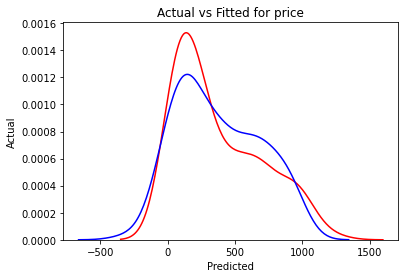

In [340]:
#Distribution plot of actual and predicted values
ax1=sns.distplot(y,hist=False,color='r',label='Actual values')
sns.distplot(yhat,hist=False,color='b',label='Predicted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [325]:
coeff_df=pd.DataFrame(lm.coef_,x.columns,columns=['Coefficients'])

In [326]:
coeff_df

,Coefficients
Bream,-147.119626
Parkki,-69.885482
Perch,-4.550068
Pike,-29.481343
Roach,-20.229146
Smelt,290.909293
Whitefish,-19.643629
Length1,-13.942313
Length2,46.544372
Length3,-17.521409


From above result we conclude that 1 unit change in Width changes the Weight by 49.38 and 1 unit change in Height changes the Weight by 43.61.

In [341]:
print(lm.intercept_)

-611.7987614851354


In [327]:
#Take the values as X and Y
X=x.values
y=y.values

## Linear Regression with Train-Test Split

In [328]:
#split data into train and test format
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [329]:
model=LinearRegression()

In [330]:
model.fit(X_train,y_train)

LinearRegression()

In [331]:
#prediction for a train data
pred=model.predict(X_train)

In [332]:
#Score/Accuracy
print('Accuracy',model.score(X_train,y_train)*100)

Accuracy 94.25340935966298


In [333]:
mse=mean_squared_error(y_train,pred)
r_squared=r2_score(y_train,pred)
rmse=sqrt(mse)

In [334]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 5738.976568707393
Root_mean_squared_error: 75.75603321655242
r_square_value: 0.9425340935966298


In [335]:
#Prediction for test data.
pred_t=model.predict(X_test)

In [336]:
#Score/Accuracy
print('Accuracy',model.score(X_test,y_test)*100)

Accuracy 94.48695857562427


In [337]:
mse=mean_squared_error(y_test,pred_t)
r_squared=r2_score(y_test,pred_t)
rmse=sqrt(mse)

In [338]:
print("Mean_squared_error:",mse)
print("Root_mean_squared_error:",rmse)
print("r_square_value:",r_squared)

Mean_squared_error: 5442.1232789484775
Root_mean_squared_error: 73.77074812517816
r_square_value: 0.9448695857562427


C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Komal S Boraste\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


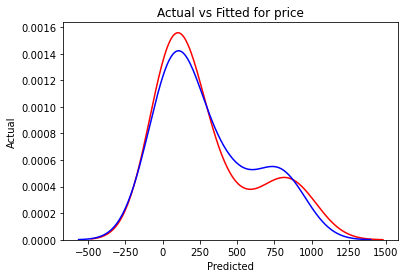

In [339]:
#Distribution plot of actual and predicted values
ax1=sns.distplot(y_test,hist=False,color='r',label='Actual values')
sns.distplot(pred_t,hist=False,color='b',label='Predicted values',ax=ax1)
plt.title('Actual vs Fitted for price')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Cross Validation

In [345]:
from sklearn.model_selection import cross_val_score

In [346]:
Rcross=cross_val_score(model,X_train,y_train,cv=4)

In [347]:
Rcross

array([0.90808135, 0.95438041, 0.92933911, 0.89244516])

There is no variability in RScore of train data, hence model is good.

### Q.4 What is the mean score of the model at 95% confidence interval?


In [359]:
import scipy.stats as st
#Mean score  of the model at 95% confidence interval
st.norm.interval(alpha=0.95,loc=np.mean(df_combine),scale=st.sem(df_combine))

(array([1.58686353e-01, 3.02097637e-02, 2.83456154e-01, 4.47484263e-02,
        7.55740708e-02, 4.47484263e-02, 8.18690469e-03, 3.25073131e+02,
        2.42246923e+01, 2.62498492e+01, 2.88928091e+01, 8.27254344e+00,
        4.11331500e+00]),
 array([2.90031596e-01, 1.10815877e-01, 4.34492564e-01, 1.34738753e-01,
        1.80836186e-01, 1.34738753e-01, 6.87361722e-02, 4.25361485e+02,
        2.70868462e+01, 2.93232277e+01, 3.22494986e+01, 9.62971298e+00,
        4.63812346e+00]))